## Import Libraries.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Used this to get the gather my own playlist data then extrapolated the info by turning them into csv's.

+ App created by plamere and track property explanation as well listed below. 
+ http://organizeyourmusic.playlistmachinery.com/

## Track Properties 

1.) ***Genre*** - the genre of the track

2.) ***Year*** - the release year of the recording. Note that due to vagaries of releases, re-releases, re-issues and general madness, sometimes the release years are not what you'd expect.

3.) ***Added*** - the earliest date you added the track to your collection.

4.) ***Beats Per Minute (BPM)*** - The tempo of the song.

5.) ***Energy*** - The energy of a song - the higher the value, the more energtic the song.

6.) ***Danceability*** - The higher the value, the easier it is to dance to this song.

7.) ***Loudness (dB)*** - The higher the value, the louder the song.

8.) ***Liveness*** - The higher the value, the more likely the song is a live recording.

9.) ***Valence*** - The higher the value, the more positive mood for the song.

10.) ***Length*** - The duration of the song.

11.) ***Acousticness*** - The higher the value the more acoustic the song is.

12.) ***Speechiness*** - The higher the value the more spoken word the song contains.

13.) ***Popularity*** - The higher the value the more popular the song is.

14.) ***Duration*** - The length of the song.

In [22]:
#Creating a folder path to concatenate all csv's I gathered from the app.
folder_path = './Data'

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
spot = pd.DataFrame()

# Loop through each CSV file and concatenate its data to the main DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    spot = pd.concat([spot, df], ignore_index=True)

In [3]:
spot.head()

,Unnamed: 0,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Chop Suey!,System Of A Down,alternative metal,2001,1969‑12‑31,127,93,42,-4,13,29,210,0,12,86
1,2,Just Pretend,Bad Omens,american metalcore,2022,1969‑12‑31,140,83,46,-5,10,20,205,0,8,81
2,3,Monster,Skillet,alternative metal,2009,1969‑12‑31,135,96,64,-2,8,69,178,4,7,80
3,4,Popular Monster,Falling In Reverse,alternative metal,2019,1969‑12‑31,165,90,46,-4,10,36,221,1,9,78
4,5,Watch The World Burn,Falling In Reverse,alternative metal,2023,1969‑12‑31,162,78,40,-6,21,35,204,1,13,78


## Dropping and renaming columns.

In [4]:
spot.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
spot.rename(columns = {'dnce': 'dance', 'nrgy': 'energy', 'val': 'valence', 'pop': 'popularity', 'title': 'song title'}, inplace = True)

In [6]:
spot.head()

,song title,artist,top genre,year,added,bpm,energy,dance,dB,live,valence,dur,acous,spch,popularity
0,Chop Suey!,System Of A Down,alternative metal,2001,1969‑12‑31,127,93,42,-4,13,29,210,0,12,86
1,Just Pretend,Bad Omens,american metalcore,2022,1969‑12‑31,140,83,46,-5,10,20,205,0,8,81
2,Monster,Skillet,alternative metal,2009,1969‑12‑31,135,96,64,-2,8,69,178,4,7,80
3,Popular Monster,Falling In Reverse,alternative metal,2019,1969‑12‑31,165,90,46,-4,10,36,221,1,9,78
4,Watch The World Burn,Falling In Reverse,alternative metal,2023,1969‑12‑31,162,78,40,-6,21,35,204,1,13,78


## Checking for null values.

In [7]:
spot.isnull().sum()

song title      0
artist          0
top genre     327
year            0
added           0
bpm             0
energy          0
dance           0
dB              0
live            0
valence         0
dur             0
acous           0
spch            0
popularity      0
dtype: int64

In [8]:
spot.shape

(1409, 15)

In [9]:
# See what the nulls are to see if they need to be deleted or not.

# Set nulls to a variable to check what they are.
nulls = spot.isnull()

# Create a boolean mask that identifies rows with any null values
rows_with_nulls = nulls.any(axis=1)

# Use the boolean mask to filter the DataFrame and get rows with nulls
rows_containing_nulls = spot[rows_with_nulls]

# Print the rows containing nulls
print(rows_containing_nulls)

                   song title       artist top genre  year       added  bpm  \
28    Smells Like Teen Spirit       Witchz       NaN  2021  1969‑12‑31  114   
49                       RISE         YMIR       NaN  2022  1969‑12‑31  150   
115            So Far So Good  Sun Of They       NaN  2022  2023‑09‑08   74   
116                  Apricity    Imala Zir       NaN  2022  2023‑09‑08   75   
117                  Solatium    Imber Sun       NaN  2022  2023‑09‑08  112   
...                       ...          ...       ...   ...         ...  ...   
1392                     D13.    Kill Dyll       NaN  2022  1969‑12‑31  110   
1394               the motive       BTWRKS       NaN  2022  1969‑12‑31  143   
1396             Ready or Not       Hulvey       NaN  2020  1969‑12‑31  143   
1403                Baby Stop   Altajmusic       NaN  2022  1969‑12‑31   82   
1407             Fall in Line    Yung Rare       NaN  2019  1969‑12‑31  151   

      energy  dance  dB  live  valence  dur  acous 

In [10]:
# Replace all the NaN's with 'Alternative' since these are alternative bands.
spot.fillna('alternative', inplace = True)

In [11]:
# Checking to make sure all nulls are gone.
spot.isnull().sum()

song title    0
artist        0
top genre     0
year          0
added         0
bpm           0
energy        0
dance         0
dB            0
live          0
valence       0
dur           0
acous         0
spch          0
popularity    0
dtype: int64

In [12]:
# Checking for duplicates since I do not want repeat songs.
title_duplicates = spot['song title'].duplicated()

# Looking at the rows if any dupes
title_dupe_rows = spot[title_duplicates]

print(title_dupe_rows)

       song title         artist                top genre  year       added  \
260   In Due Time  Broken Legacy              alternative  2022  2023‑09‑08   
319    Beginnings      Bon Bruit              alternative  2020  2023‑09‑08   
788     Gratitude        HILLEVI              alternative  2021  2023‑09‑05   
804      Apricity  Ivalu Karlsen         background piano  2019  2023‑09‑05   
854        Anyone     Lena Terne              alternative  2022  2023‑09‑05   
...           ...            ...                      ...   ...         ...   
1347     Fly Away    Tones And I           australian pop  2021  2023‑08‑29   
1350      Lil Bit          Nelly                dance pop  2020  2023‑08‑29   
1358   Big Energy          Latto               trap queen  2021  2023‑08‑29   
1377      Enemies      The Score  modern alternative rock  2022  1969‑12‑31   
1393     Detonate             G2           brighton indie  2023  1969‑12‑31   

      bpm  energy  dance  dB  live  valence  dur  a

In [13]:
# Drop the duplicate songs so we do not have any overlap from the downloaded playlists.
spot = spot.drop_duplicates(subset = 'song title')

In [14]:
# Checking the shape.
spot.shape

(1288, 15)

In [15]:
spot.head()

,song title,artist,top genre,year,added,bpm,energy,dance,dB,live,valence,dur,acous,spch,popularity
0,Chop Suey!,System Of A Down,alternative metal,2001,1969‑12‑31,127,93,42,-4,13,29,210,0,12,86
1,Just Pretend,Bad Omens,american metalcore,2022,1969‑12‑31,140,83,46,-5,10,20,205,0,8,81
2,Monster,Skillet,alternative metal,2009,1969‑12‑31,135,96,64,-2,8,69,178,4,7,80
3,Popular Monster,Falling In Reverse,alternative metal,2019,1969‑12‑31,165,90,46,-4,10,36,221,1,9,78
4,Watch The World Burn,Falling In Reverse,alternative metal,2023,1969‑12‑31,162,78,40,-6,21,35,204,1,13,78


In [16]:
# Saving the cleaned dataframe as a csv.
final = 'final.csv'

spot.to_csv(final, index = False)

## EDA

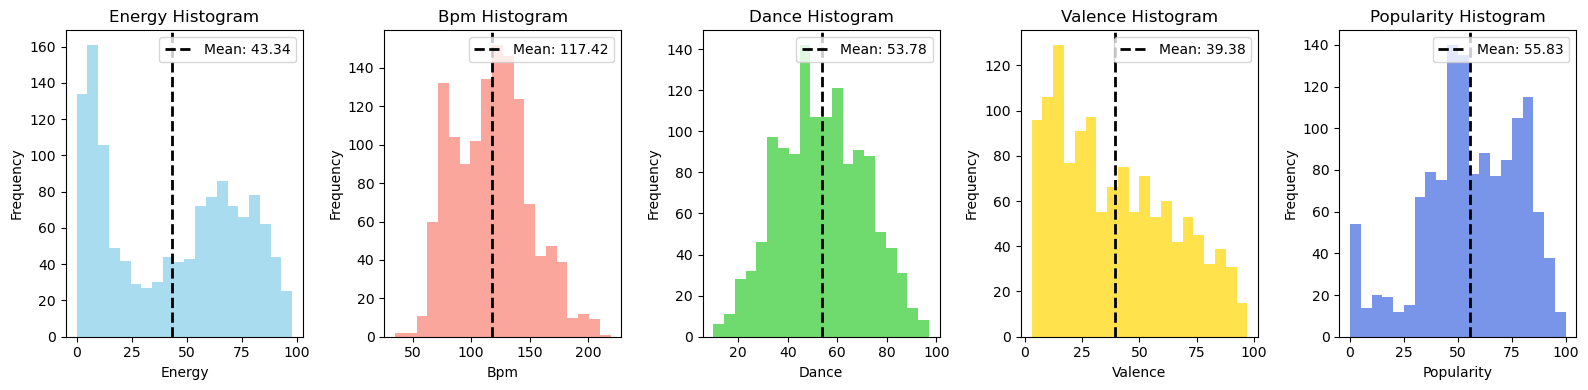

In [17]:
# Lets take a look more into the distribution of some of the main features listed.

#Columns and colors.
columns_to_plot = ['energy', 'bpm', 'dance', 'valence', 'popularity']
histogram_colors = ['skyblue', 'salmon', 'limegreen', 'gold', 'royalblue']

# Create subplots for the selected columns
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(16, 4))

# Iterate through the selected columns and create histograms with different colors
for i, (col, color) in enumerate(zip(columns_to_plot, histogram_colors)):
    data = spot[col]
    
    # Create the histogram
    n, bins, patches = axes[i].hist(data, bins=20, color=color, alpha=0.7)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col.capitalize()} Histogram')
    
    # Calculate the mean of the data
    mean_value = data.mean()
    
    # Add a vertical line at the mean
    axes[i].axvline(x=mean_value, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        
    axes[i].legend()

plt.tight_layout()

plt.show();

***Findings***
+ Looks like the majority of songs are lower energy with it then going to a higher frequency of higher energy songs.
+ BPM for the majority of the songs are at a good pace of 117.42 beats per minute.
+ Almost a even split among danceability for the songs in the dataset.
+ Looks like the mood for our music is lacking in positivity.
+ We are generally dealling with popular music in the dataset.

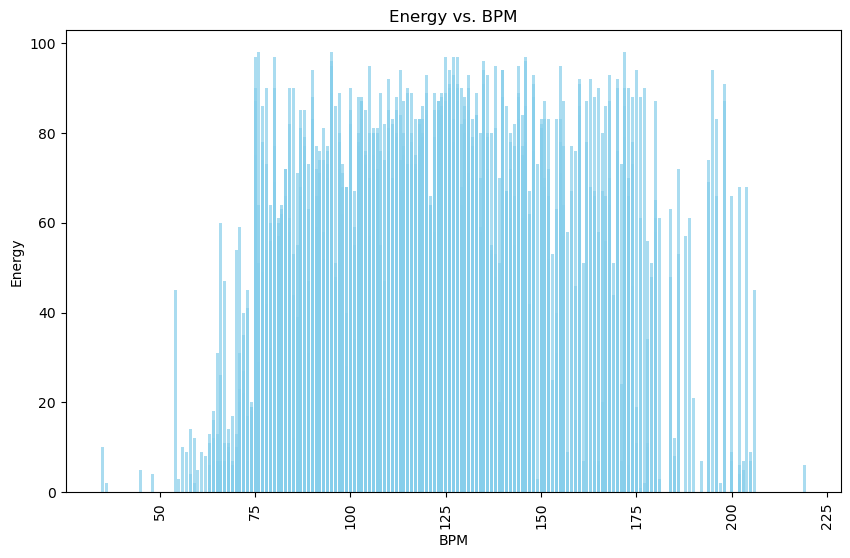

In [18]:
# Using a bar plot to see how much BPM effects the energy of a song.
bpm = spot['bpm']
energy = spot['energy']

plt.figure(figsize=(10, 6))
plt.bar(bpm, energy, color='skyblue', alpha=0.7)
plt.xlabel('BPM')
plt.ylabel('Energy')
plt.title('Energy vs. BPM')
plt.xticks(rotation=90);

From 75 BPM onward it looks like energy isn't wildly affected.

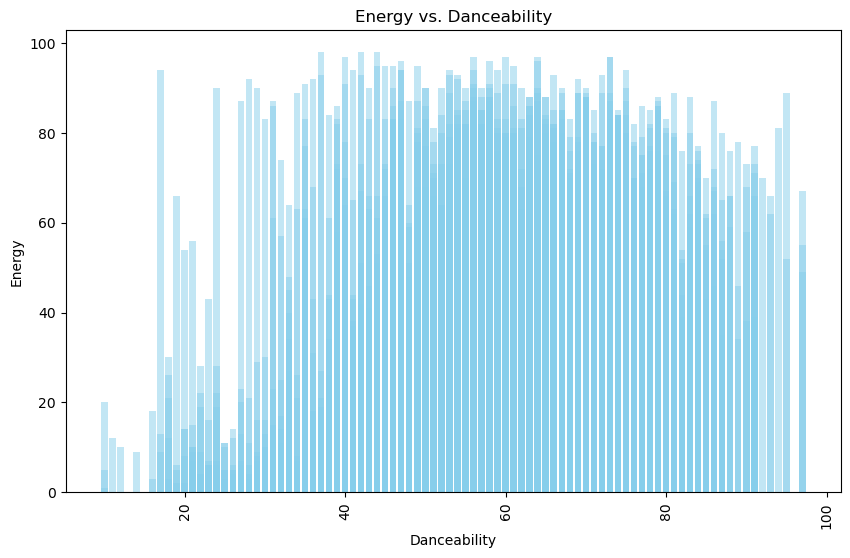

In [19]:
dance = spot['dance']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(dance, energy, color='skyblue', alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Energy vs. Danceability')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

We can see by adjusting the opacity energy seems to be highest and most frequent from the 50-65 range. 

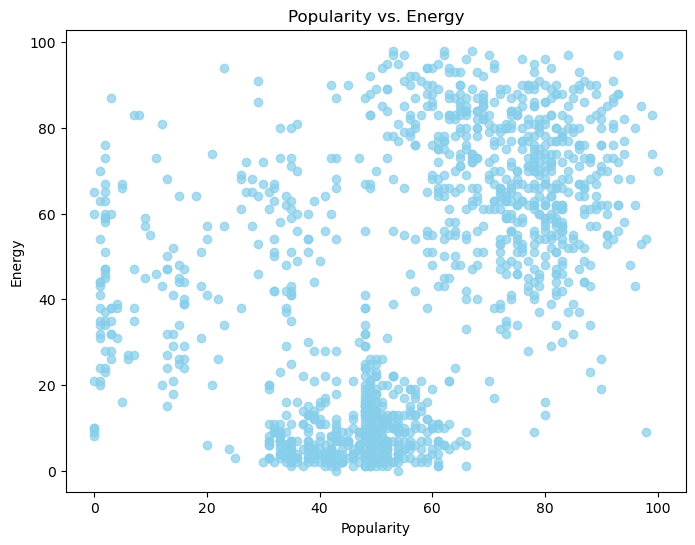

In [20]:
#Creating a scatterplot to see what type of clusters there will be for popularity and energy. 
popularity = spot['popularity']

plt.figure(figsize=(8, 6))
plt.scatter(popularity, energy, color='skyblue', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.title('Popularity vs. Energy')
plt.show()

Energy is highest am most frequent the more popular a song is which ties well with the other graphs we have looked into. We seem got have two distinct clusters and a random distribution the lower the popularity of the songs. This could be due to the topics covered in the songs like happiness, sadness, anger, etc...

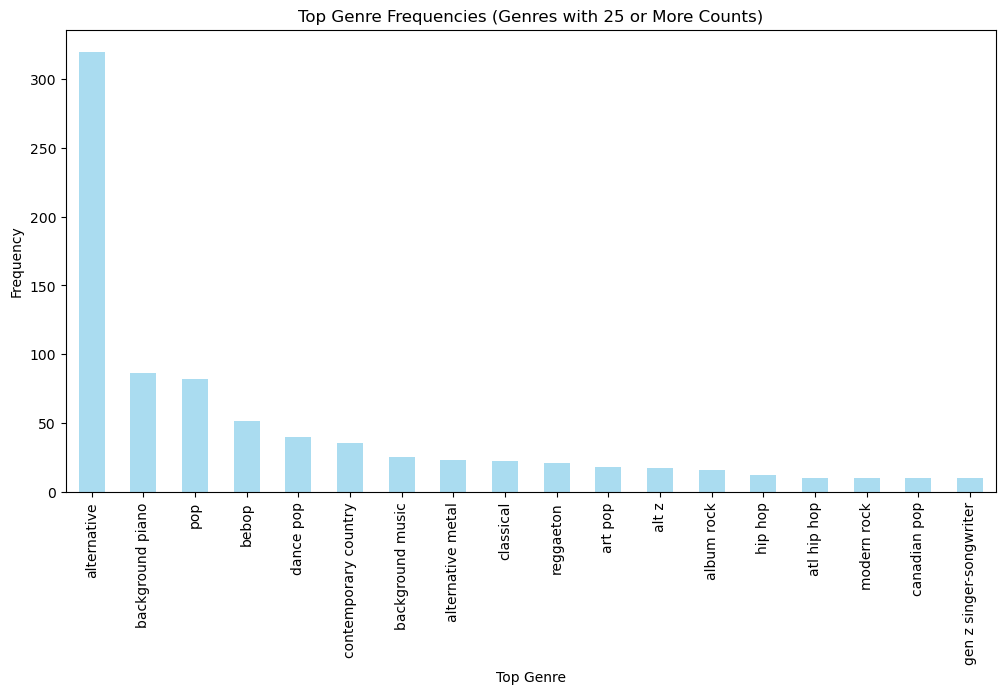

In [21]:
# Creating a bar plot of the top 25 genres to see if I can deduce the topics being covered in the clusters.
top_genre = spot['top genre']

# Count the frequency of each unique value in the "top genre" column
genre_counts = top_genre.value_counts()

# Filter genres with 25 or more counts
filtered_genre_counts = genre_counts[genre_counts >= 10]

# Create a bar plot for filtered genre frequencies
plt.figure(figsize=(12, 6))
filtered_genre_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Top Genre')
plt.ylabel('Frequency')
plt.title('Top Genre Frequencies (Genres with 25 or More Counts)')
plt.xticks(rotation=90) 
plt.show()


We can see that adding the alternative value with the NaNs made alternative the most frequent genre in the dataset. Now as we were looking at the dataset before we could see that a lot of the artists in the alternative category were mixed genres, which is probably why it showed up as a NaN since it was more than one genre. This was followed by background piano which would explain the random spots in popularity and beats per minute since that is a very niche genre. Besides seeing the distribution here it is hard to build any real insight for what topics could've been covered in the genres. 

## Conclusion